In [1]:
import yfinance as yf
import pandas as pd
from datetime import date

# Define the stock and the time period
ticker_symbol = "RELIANCE.NS"
start_date = "2020-01-01"
end_date = date.today().strftime("%Y-%m-%d")
try:
    print(f"Downloading 5 years of stock data for {ticker_symbol}...")
    stock_df = yf.download(ticker_symbol, start=start_date, end=end_date)

    if not stock_df.empty:
        file_path = "reliance_stock_data_5_years.csv"
        stock_df.to_csv(file_path)
        print(f"✅ Success! Data downloaded and saved to '{file_path}'")
        print(f"Data shape: {stock_df.shape}")
        display(stock_df.tail())
    else:
        print("❌ Download failed. The returned data was empty.")

except Exception as e:
    print(f"An error occurred: {e}")

/tmp/ipykernel_2340/1613629470.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = yf.download(ticker_symbol, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed

✅ Success! Data downloaded and saved to 'reliance_stock_data_5_years.csv'
Data shape: (1475, 5)


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2025-12-05,1540.599976,1545.800049,1520.599976,1530.400024,10183266
2025-12-08,1543.000000,1551.000000,1535.000000,1539.199951,11301491
2025-12-09,1529.400024,1542.500000,1520.099976,1540.300049,11503971
2025-12-10,1536.900024,1547.500000,1531.400024,1534.000000,7991629
2025-12-11,1545.000000,1550.000000,1524.000000,1536.900024,4706197


In [2]:
!pip install gnews

In [3]:
import pandas as pd
from gnews import GNews
import time
from datetime import datetime

# This list will store all the articles we find
all_news = []
start_year = 2020
end_year = datetime.now().year

print(f"Starting deep news search from {start_year} to {end_year}. This will take a long time...")

# Loop through each year and each month
for year in range(start_year, end_year + 1):
    for month in range(1, 13):
        # Stop if we are in the future
        if year == end_year and month > datetime.now().month:
            break
            
        print(f"Fetching news for month: {year}-{month:02d}...")
        
        # Define the start and end date for the current month
        start_date = (year, month, 1)
        if month == 12:
            end_date = (year + 1, 1, 1)
        else:
            end_date = (year, month + 1, 1)
            
        # Initialize GNews for this specific time period
        google_news = GNews(language='en', country='IN', start_date=start_date, end_date=end_date)
        
        # Get the news and add it to our master list
        monthly_news = google_news.get_news('Reliance Industries')
        if monthly_news:
            all_news.extend(monthly_news)
        
        # Be polite to the server and wait 1 second between requests
        time.sleep(1)

# --- Process the final, large dataset ---
if all_news:
    news_df = pd.DataFrame(all_news)
    
    # Clean up and save the data
    news_df = news_df[['published date', 'title', 'publisher']]
    news_df.rename(columns={'published date': 'date', 'publisher': 'source'}, inplace=True)
    
    file_path = "reliance_news_data_FULL.csv"
    news_df.to_csv(file_path, index=False)
    
    print(f"\n✅ FULL news download complete! Data saved to '{file_path}'")
    print(f"Total articles found: {len(news_df)}")
    display(news_df.head())
else:
    print("❌ No articles were found with the deep search.")

Starting deep news search from 2020 to 2025. This will take a long time...
Fetching news for month: 2020-01...


Fetching news for month: 2020-02...


Fetching news for month: 2020-03...


Fetching news for month: 2020-04...


Fetching news for month: 2020-05...


Fetching news for month: 2020-06...


Fetching news for month: 2020-07...


Fetching news for month: 2020-08...


Fetching news for month: 2020-09...


Fetching news for month: 2020-10...


Fetching news for month: 2020-11...


Fetching news for month: 2020-12...


Fetching news for month: 2021-01...


Fetching news for month: 2021-02...


Fetching news for month: 2021-03...


Fetching news for month: 2021-04...


Fetching news for month: 2021-05...


Fetching news for month: 2021-06...


Fetching news for month: 2021-07...


Fetching news for month: 2021-08...


Fetching news for month: 2021-09...


Fetching news for month: 2021-10...


Fetching news for month: 2021-11...


Fetching news for month: 2021-12...


Fetching news for month: 2022-01...


Fetching news for month: 2022-02...


Fetching news for month: 2022-03...


Fetching news for month: 2022-04...


Fetching news for month: 2022-05...


Fetching news for month: 2022-06...


Fetching news for month: 2022-07...


Fetching news for month: 2022-08...


Fetching news for month: 2022-09...


Fetching news for month: 2022-10...


Fetching news for month: 2022-11...


Fetching news for month: 2022-12...


Fetching news for month: 2023-01...


Fetching news for month: 2023-02...


Fetching news for month: 2023-03...


Fetching news for month: 2023-04...


Fetching news for month: 2023-05...


Fetching news for month: 2023-06...


Fetching news for month: 2023-07...


Fetching news for month: 2023-08...


Fetching news for month: 2023-09...


Fetching news for month: 2023-10...


Fetching news for month: 2023-11...


Fetching news for month: 2023-12...


Fetching news for month: 2024-01...


Fetching news for month: 2024-02...


Fetching news for month: 2024-03...


Fetching news for month: 2024-04...


Fetching news for month: 2024-05...


Fetching news for month: 2024-06...


Fetching news for month: 2024-07...


Fetching news for month: 2024-08...


Fetching news for month: 2024-09...


Fetching news for month: 2024-10...


Fetching news for month: 2024-11...


Fetching news for month: 2024-12...


Fetching news for month: 2025-01...


Fetching news for month: 2025-02...


Fetching news for month: 2025-03...


Fetching news for month: 2025-04...


Fetching news for month: 2025-05...


Fetching news for month: 2025-06...


Fetching news for month: 2025-07...


Fetching news for month: 2025-08...


Fetching news for month: 2025-09...


Fetching news for month: 2025-10...


Fetching news for month: 2025-11...


Fetching news for month: 2025-12...



✅ FULL news download complete! Data saved to 'reliance_news_data_FULL.csv'
Total articles found: 4882


,date,title,source
0,"Tue, 21 Jan 2020 08:00:00 GMT",Mukesh Ambani's Reliance Industries is India's...,"{'href': 'https://www.livemint.com', 'title': ..."
1,"Wed, 29 Jan 2020 08:00:00 GMT",Reliance Industries plans to market ‘Plastic t...,{'href': 'https://www.thehindubusinessline.com...
2,"Thu, 02 Jan 2020 08:00:00 GMT",Reliance Industries is starting to roll out it...,"{'href': 'https://www.businessinsider.com', 't..."
3,"Mon, 06 Jan 2020 08:00:00 GMT",Is 2020 The Year That Reliance Becomes India's...,"{'href': 'https://variety.com', 'title': 'Vari..."
4,"Tue, 07 Jan 2020 08:00:00 GMT",Reliance refers to start-up playbook to grow J...,"{'href': 'https://www.business-standard.com', ..."


In [4]:
import pandas as pd

file_path = "reliance_stock_data_5_years.csv"

print("Starting the one-time fix for the stock data CSV file...")

try:
    # Step 1: Load the messy CSV file using our robust command
    clean_df = pd.read_csv(
        file_path,
        index_col=0,
        parse_dates=True,
        skiprows=[1, 2]
    )
    clean_df.index.name = 'Date'
    print(" -> Successfully loaded the messy data into memory.")

    # Step 2: Save the clean DataFrame back to the SAME file path
    # This will OVERWRITE the old, messy file with a clean one.
    clean_df.to_csv(file_path)
    print(f" -> Successfully saved a clean version back to '{file_path}'.")

    print("\n✅✅✅ PERMANENT FIX COMPLETE ✅✅✅")
    print("The stock data CSV file is now permanently fixed. You will not see this error again.")

except Exception as e:
    print(f"An error occurred during the fix: {e}")

Starting the one-time fix for the stock data CSV file...
 -> Successfully loaded the messy data into memory.
 -> Successfully saved a clean version back to 'reliance_stock_data_5_years.csv'.

✅✅✅ PERMANENT FIX COMPLETE ✅✅✅
The stock data CSV file is now permanently fixed. You will not see this error again.


In [5]:
!conda install -c conda-forge nltk -y

CI detected...
By accessing https://repo.anaconda.com/pkgs/main via CI for this repository you 
acknowledge and agree to the Terms of Service:
ANACONDA TERMS OF SERVICE
Effective Date: July 15, 2025

See https://anaconda.com/legal/terms/terms-of-service
By accessing https://repo.anaconda.com/pkgs/r via CI for this repository you 
acknowledge and agree to the Terms of Service:
ANACONDA TERMS OF SERVICE
Effective Date: July 15, 2025

See https://anaconda.com/legal/terms/terms-of-service
2 channel Terms of Service accepted
Retrieving notices: - 

\ 

| 

/ 

done


Channels:
 - conda-forge
 - defaults
Platform: linux-64

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

done
Solving environment: | 

/ 

done




==> WARNING: A newer version of conda exists. <==
    current version: 25.9.1
    latest version: 25.11.0

Please update conda by running

    $ conda update -n base -c defaults conda





## Package Plan ##

  environment location: /usr/share/miniconda

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.11.12 |       hbd8a1cb_0         149 KB  conda-forge
    certifi-2025.11.12         |     pyhd8ed1ab_0         153 KB  conda-forge
    conda-25.11.0              |  py313h78bf25f_0         1.2 MB  conda-forge
    joblib-1.5.2               |     pyhd8ed1ab_0         219 KB  conda-forge
    nltk-3.9.2                 |     pyhcf101f3_1         1.1 MB  conda-forge
    openssl-3.6.0              |       h26f9b46_0         3.0 MB  conda-forge
    regex-2025.11.3            |  py313h07c4f96_1         402 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.2 MB

The following NEW packages will be INSTALLED:

  joblib             conda-


conda-25.11.0        | 1.2 MB    | 4                                     |   1% 


openssl-3.6.0        | 3.0 MB    | 1                                     |   1% 



joblib-1.5.2         | 219 KB    | ##6                                   |   7% 


regex-2025.11.3      | 402 KB    | ##################################### | 100% 





joblib-1.5.2         | 219 KB    | ##################################### | 100% 
conda-25.11.0        | 1.2 MB    | ##################################### | 100% 

nltk-3.9.2           | 1.1 MB    | 5                                     |   1% 




certifi-2025.11.12   | 153 KB    | ###8                                  |  10% 






certifi-2025.11.12   | 153 KB    | ##################################### | 100% 





ca-certificates-2025 | 149 KB    | ###9                                  |  11% 





ca-certificates-2025 | 149 KB    | ##################################### | 100% 


regex-2025.11.3      | 402 KB    | ##################################### | 100% 


regex-2025.11.3      | 402 KB    | ##################################### | 100% 

nltk-3.9.2           | 1.1 MB    | ##################################### | 100% 

openssl-3.6.0        | 3.0 MB    | ##################################### | 100% 




certifi-2025.11.12   | 153 KB    | ##################################### | 100% 





ca-certificates-2025 | 149 KB    | ##################################### | 100% 





joblib-1.5.2         | 219 KB    | ##################################### | 100% 



joblib-1.5.2         | 219 KB    | ##################################### | 100% 

openssl-3.6.0        | 3.0 MB    | ##################################### | 100% 
conda-25.11.0        | 1.2 MB    | ##################################### | 100% 


conda-25.11.0        | 1.2 MB    | ##################################### | 100% 

nltk-3.9.2           | 1.1 MB    | ##################################### | 100% 


                                                                                

                                                                                


                                                                                



                                                                                




                                                                                






Preparing transaction: \ 

done
Verifying transaction: / 

- 

done


Executing transaction: | 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

done


In [6]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# --- NLTK Setup ---
# This directly downloads the required resources.
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
# --------------------

# Initialize the tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Cleans a text string by making it lowercase, removing punctuation,
    numbers, stopwords, and then lemmatizing the words.
    """
    if not isinstance(text, str):
        return ""
        
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    words = text.lower().split()
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return " ".join(cleaned_words)

print("✅ The clean_text function is now ready to use.")

[nltk_data] Downloading package stopwords to /home/runner/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/runner/nltk_data...
[nltk_data] Downloading package omw-1.4 to /home/runner/nltk_data...


✅ The clean_text function is now ready to use.


In [7]:
import pandas as pd

# Load the full news dataset from the CSV file
file_path = "reliance_news_data_FULL.csv"
news_df = pd.read_csv(file_path)

# Apply our cleaning function to the 'title' column
print("Cleaning all news headlines... this may take a minute.")
news_df['cleaned_title'] = news_df['title'].apply(clean_text)
print("✅ Text cleaning complete.")

# Display the original and cleaned titles to see the result
display(news_df[['title', 'cleaned_title']].head())

Cleaning all news headlines... this may take a minute.


✅ Text cleaning complete.


,title,cleaned_title
0,Mukesh Ambani's Reliance Industries is India's...,mukesh ambanis reliance industry india answer ...
1,Reliance Industries plans to market ‘Plastic t...,reliance industry plan market plastic road ini...
2,Reliance Industries is starting to roll out it...,reliance industry starting roll new ecommerce ...
3,Is 2020 The Year That Reliance Becomes India's...,year reliance becomes india digital champion v...
4,Reliance refers to start-up playbook to grow J...,reliance refers startup playbook grow jio inte...


In [8]:
import os
import shutil
from pathlib import Path

# Define the cache directory
cache_dir = Path.home() / ".cache" / "huggingface"

try:
    if os.path.exists(cache_dir):
        print(f"Found cache directory at: {cache_dir}")
        shutil.rmtree(cache_dir)
        print("✅ Hugging Face cache has been cleared successfully.")
    else:
        print("Cache directory not found, no action needed.")

except Exception as e:
    print(f"An error occurred while clearing the cache: {e}")

Cache directory not found, no action needed.


In [9]:
import pandas as pd
import torch
# --- CHANGE 1: Import the specific BERT model class ---
from transformers import AutoTokenizer, BertForSequenceClassification

# --- 1. Load the FinBERT Model and Tokenizer ---
print("Loading FinBERT model and tokenizer...")
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
# --- CHANGE 2: Use the specific class to load the model ---
model = BertForSequenceClassification.from_pretrained("ProsusAI/finbert")
print("✅ Model and tokenizer loaded.")

# --- 2. Load Your Cleaned News Data ---
file_path = "reliance_news_data_FULL.csv"
news_df = pd.read_csv(file_path)
news_df.dropna(subset=['title'], inplace=True)
news_df['cleaned_title'] = news_df['title'].apply(clean_text)

# --- 3. Define a Function for Batch Sentiment Analysis ---
def get_finbert_sentiments(text_list):
    inputs = tokenizer(text_list, padding=True, truncation=True, return_tensors="pt", max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment_labels = [model.config.id2label[label_id] for label_id in torch.argmax(predictions, dim=1).tolist()]
    return sentiment_labels

# --- 4. Process the Headlines in Batches ---
print("\nStarting sentiment analysis with FinBERT. This will take a very long time...")
batch_size = 64
all_sentiments = []
titles_to_process = news_df['cleaned_title'].tolist()

for i in range(0, len(titles_to_process), batch_size):
    batch = titles_to_process[i:i + batch_size]
    sentiments = get_finbert_sentiments(batch)
    all_sentiments.extend(sentiments)
    print(f"  Processed {min(i + batch_size, len(titles_to_process))}/{len(titles_to_process)} headlines...")

# --- 5. Add Sentiments to DataFrame ---
news_df['finbert_sentiment'] = all_sentiments
print("\n✅ FinBERT sentiment analysis complete.")
display(news_df[['cleaned_title', 'finbert_sentiment']].head())

# Save the results to a new CSV
news_df.to_csv("reliance_news_with_finbert_sentiment.csv", index=False)
print("✅ Results have been saved to 'reliance_news_with_finbert_sentiment.csv'")

2025-12-12 14:44:30.719741: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


12/12/2025 02:44:32 PM - Failed to extract font properties from /usr/share/fonts/truetype/noto/NotoColorEmoji.ttf: In FT2Font: Can not load face (unknown file format; error code 0x2)


12/12/2025 02:44:32 PM - generated new fontManager


Loading FinBERT model and tokenizer...


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

✅ Model and tokenizer loaded.


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]


Starting sentiment analysis with FinBERT. This will take a very long time...


  Processed 64/4882 headlines...


  Processed 128/4882 headlines...


  Processed 192/4882 headlines...


  Processed 256/4882 headlines...


  Processed 320/4882 headlines...


  Processed 384/4882 headlines...


  Processed 448/4882 headlines...


  Processed 512/4882 headlines...


  Processed 576/4882 headlines...


  Processed 640/4882 headlines...


  Processed 704/4882 headlines...


  Processed 768/4882 headlines...


  Processed 832/4882 headlines...


  Processed 896/4882 headlines...


  Processed 960/4882 headlines...


  Processed 1024/4882 headlines...


  Processed 1088/4882 headlines...


  Processed 1152/4882 headlines...


  Processed 1216/4882 headlines...


  Processed 1280/4882 headlines...


  Processed 1344/4882 headlines...


  Processed 1408/4882 headlines...


  Processed 1472/4882 headlines...


  Processed 1536/4882 headlines...


  Processed 1600/4882 headlines...


  Processed 1664/4882 headlines...


  Processed 1728/4882 headlines...


  Processed 1792/4882 headlines...


  Processed 1856/4882 headlines...


  Processed 1920/4882 headlines...


  Processed 1984/4882 headlines...


  Processed 2048/4882 headlines...


  Processed 2112/4882 headlines...


  Processed 2176/4882 headlines...


  Processed 2240/4882 headlines...


  Processed 2304/4882 headlines...


  Processed 2368/4882 headlines...


  Processed 2432/4882 headlines...


  Processed 2496/4882 headlines...


  Processed 2560/4882 headlines...


  Processed 2624/4882 headlines...


  Processed 2688/4882 headlines...


  Processed 2752/4882 headlines...


  Processed 2816/4882 headlines...


  Processed 2880/4882 headlines...


  Processed 2944/4882 headlines...


  Processed 3008/4882 headlines...


  Processed 3072/4882 headlines...


  Processed 3136/4882 headlines...


  Processed 3200/4882 headlines...


  Processed 3264/4882 headlines...


  Processed 3328/4882 headlines...


  Processed 3392/4882 headlines...


  Processed 3456/4882 headlines...


  Processed 3520/4882 headlines...


  Processed 3584/4882 headlines...


  Processed 3648/4882 headlines...


  Processed 3712/4882 headlines...


  Processed 3776/4882 headlines...


  Processed 3840/4882 headlines...


  Processed 3904/4882 headlines...


  Processed 3968/4882 headlines...


  Processed 4032/4882 headlines...


  Processed 4096/4882 headlines...


  Processed 4160/4882 headlines...


  Processed 4224/4882 headlines...


  Processed 4288/4882 headlines...


  Processed 4352/4882 headlines...


  Processed 4416/4882 headlines...


  Processed 4480/4882 headlines...


  Processed 4544/4882 headlines...


  Processed 4608/4882 headlines...


  Processed 4672/4882 headlines...


  Processed 4736/4882 headlines...


  Processed 4800/4882 headlines...


  Processed 4864/4882 headlines...


  Processed 4882/4882 headlines...

✅ FinBERT sentiment analysis complete.


,cleaned_title,finbert_sentiment
0,mukesh ambanis reliance industry india answer ...,neutral
1,reliance industry plan market plastic road ini...,neutral
2,reliance industry starting roll new ecommerce ...,neutral
3,year reliance becomes india digital champion v...,neutral
4,reliance refers startup playbook grow jio inte...,neutral


✅ Results have been saved to 'reliance_news_with_finbert_sentiment.csv'


In [10]:
import pandas as pd
import numpy as np

# --- 1. Load Your Two Processed Datasets ---
print("Loading processed stock and news data...")
stock_df = pd.read_csv("reliance_stock_data_5_years.csv", index_col=0, parse_dates=True)
news_df = pd.read_csv("reliance_news_with_finbert_sentiment.csv")
print(" -> Data loaded.")

# --- 2. Process the Stock Data (Manual Indicators) ---
print("Calculating technical indicators (SMA and RSI)...")

# Calculate 14-day Simple Moving Average (SMA)
stock_df['SMA_14'] = stock_df['Close'].rolling(window=14).mean()

# Function to calculate RSI
def calculate_rsi(data, window=14):
    close_prices = data['Close']
    delta = close_prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate 14-day RSI
stock_df['RSI_14'] = calculate_rsi(stock_df)
stock_df.dropna(inplace=True) # Drop rows with NaN values from indicator calculation
print(" -> Indicators calculated.")


# --- 3. Process the News Data ---
print("Processing news sentiment scores...")
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
news_df['sentiment_score'] = news_df['finbert_sentiment'].map(sentiment_map)
news_df['date'] = pd.to_datetime(news_df['date'])
news_df['just_date'] = news_df['date'].dt.date
daily_sentiment = news_df.groupby('just_date')['sentiment_score'].mean().reset_index()
daily_sentiment['just_date'] = pd.to_datetime(daily_sentiment['just_date'])
print(" -> Sentiment processed.")


# --- 4. Merge the Datasets ---
print("Merging stock and sentiment data...")
final_df = stock_df.merge(daily_sentiment, left_index=True, right_on='just_date', how='left')
final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment
final_df.dropna(inplace=True) # Drop any remaining NaN rows (usually from the start)
final_df.set_index('just_date', inplace=True)
final_df.index.name = 'Date'
print(" -> Data merged.")


# --- 5. Save the Final, Clean Master Dataset ---
final_df.to_csv("final_master_dataset.csv")
print("\n✅✅✅ Final master dataset created and saved to 'final_master_dataset.csv'!")
display(final_df.head())

Loading processed stock and news data...
 -> Data loaded.
Calculating technical indicators (SMA and RSI)...
 -> Indicators calculated.
Processing news sentiment scores...
 -> Sentiment processed.
Merging stock and sentiment data...
 -> Data merged.

✅✅✅ Final master dataset created and saved to 'final_master_dataset.csv'!


/tmp/ipykernel_2340/1417212574.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment
/tmp/ipykernel_2340/1417212574.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment


,Close,High,Low,Open,Volume,SMA_14,RSI_14,sentiment_score
Date,,,,,,,,
2020-01-20,685.501526,719.791148,682.839761,719.791148,32545850,685.892962,54.332550,-0.20
2020-01-21,686.194885,691.540751,680.871356,683.823922,18922720,686.669442,54.600558,0.25
2020-01-22,685.948914,691.943454,684.942368,690.713238,10322817,686.607134,49.591975,0.25
2020-01-23,683.041077,689.796095,680.289844,687.358000,11247739,686.278006,47.885848,0.25
2020-01-24,680.670166,687.290983,679.328085,683.108201,14628445,686.918679,54.701071,0.25


In [11]:
import pandas as pd
df = pd.read_csv("final_master_dataset.csv")
print("--- Verifying the final_master_dataset.csv file ---")
display(df.tail())

--- Verifying the final_master_dataset.csv file ---


,Date,Close,High,Low,Open,Volume,SMA_14,RSI_14,sentiment_score
1457,2025-12-05,1540.599976,1545.800049,1520.599976,1530.400024,10183266,1545.557146,58.814209,0.333333
1458,2025-12-08,1543.000000,1551.000000,1535.000000,1539.199951,11301491,1547.242859,59.233173,0.333333
1459,2025-12-09,1529.400024,1542.500000,1520.099976,1540.300049,11503971,1547.992859,53.726049,0.333333
1460,2025-12-10,1536.900024,1547.500000,1531.400024,1534.000000,7991629,1547.121434,44.839274,0.333333
1461,2025-12-11,1545.000000,1550.000000,1524.000000,1536.900024,4706197,1547.007150,49.353806,0.333333


In [12]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Create a new DataFrame with only the features we'll use for modeling
# We are dropping columns like Open, High, Low as they are highly correlated with Close
model_df = final_df[['Close', 'Volume', 'SMA_14', 'RSI_14', 'sentiment_score']]

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(model_df)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=model_df.columns, index=model_df.index)

print("✅ Data has been successfully scaled.")
display(scaled_df.head())

✅ Data has been successfully scaled.


,Close,Volume,SMA_14,RSI_14,sentiment_score
Date,,,,,
2020-01-20,0.242967,0.228098,0.206927,0.518806,0.400
2020-01-21,0.243548,0.132620,0.207626,0.521789,0.625
2020-01-22,0.243342,0.072348,0.207570,0.466040,0.625
2020-01-23,0.240906,0.078830,0.207273,0.447049,0.625
2020-01-24,0.238920,0.102524,0.207850,0.522908,0.625


In [13]:
import numpy as np

# --- Create sequences ---
# We'll look at 60 days of history to predict the 61st day
time_step = 60
X_data, y_data = [], []

# Loop through the scaled data to create the sequences
for i in range(time_step, len(scaled_df)):
    # X_data will contain a window of the previous 60 days
    X_data.append(scaled_df.iloc[i-time_step:i].values)
    # y_data will contain the closing price of the 61st day
    # .iloc[i, 0] gets the 'Close' price, which is the first column
    y_data.append(scaled_df.iloc[i, 0])

# Convert the lists to numpy arrays
X_data, y_data = np.array(X_data), np.array(y_data)

print("✅ Data has been successfully converted into sequences.")
print(f"Shape of X_data: {X_data.shape}")
print(f"Shape of y_data: {y_data.shape}")

✅ Data has been successfully converted into sequences.
Shape of X_data: (1402, 60, 5)
Shape of y_data: (1402,)


In [14]:
# Define the split point (80% of the data for training)
train_size = int(len(X_data) * 0.8)

# Split the data chronologically
X_train, X_test = X_data[:train_size], X_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

print("✅ Data has been successfully split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

✅ Data has been successfully split into training and testing sets.
X_train shape: (1121, 60, 5)
y_train shape: (1121,)
X_test shape: (281, 60, 5)
y_test shape: (281,)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the model architecture (without the outdated 'time_major' argument)
model = Sequential()

# Add the first LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Add a second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

2025-12-12 14:46:43.192669: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/opt/hostedtoolcache/Python/3.9.25/x64/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

Making predictions on the test data...


1/9 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step 

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


✅ Predictions have been converted back to actual Rupee values.

Model Performance on Test Data:
Mean Absolute Error (MAE): 790.95 INR
R-squared (R²) Score: -55.77


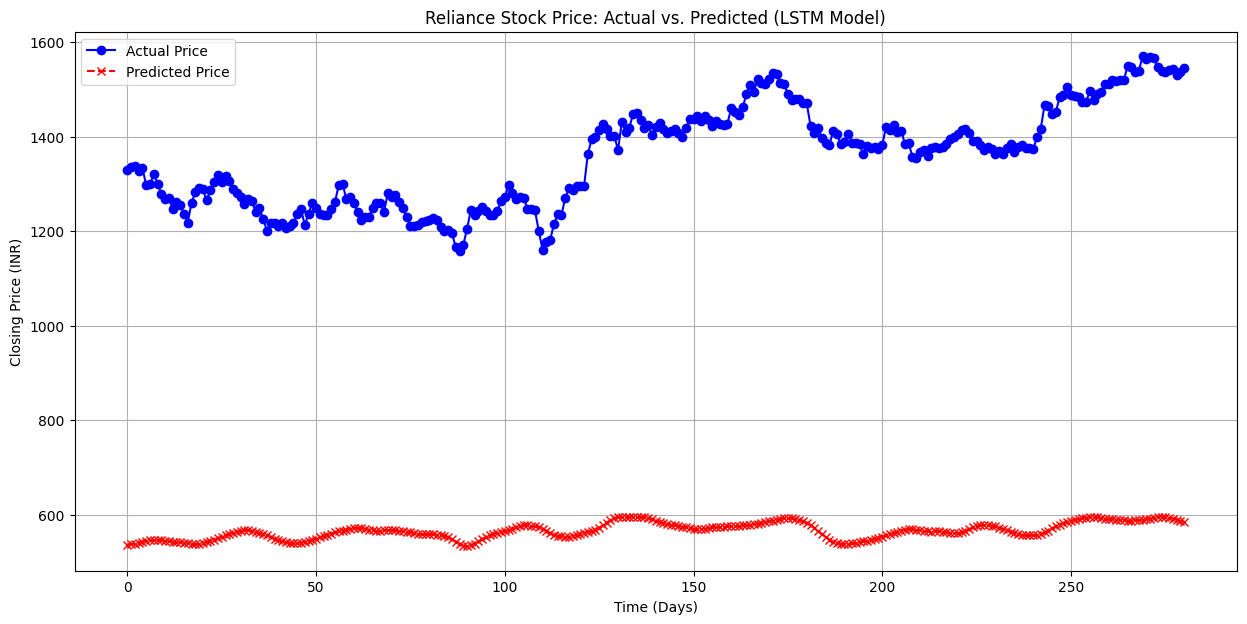

In [16]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# --- 1. Make Predictions on the Test Data ---
print("Making predictions on the test data...")
predictions_scaled = model.predict(X_test)

# --- 2. Inverse Scale the Predictions and Actuals ---
# We need to reshape the data to have 5 columns to match the scaler's input shape
# Create a dummy array with the same shape as the original data
dummy_array_pred = np.zeros((len(predictions_scaled), 5))
# Place our predictions into the first column (the 'Close' price column)
dummy_array_pred[:, 0] = predictions_scaled.ravel()
# Inverse transform the dummy array
predictions_actual = scaler.inverse_transform(dummy_array_pred)[:, 0]

# Do the same for the y_test actual values
dummy_array_actual = np.zeros((len(y_test), 5))
dummy_array_actual[:, 0] = y_test.ravel()
y_test_actual = scaler.inverse_transform(dummy_array_actual)[:, 0]
print("✅ Predictions have been converted back to actual Rupee values.")


# --- 3. Evaluate the Model's Performance ---
mae = mean_absolute_error(y_test_actual, predictions_actual)
r2 = r2_score(y_test_actual, predictions_actual)
print(f"\nModel Performance on Test Data:")
print(f"Mean Absolute Error (MAE): {mae:.2f} INR")
print(f"R-squared (R²) Score: {r2:.2f}")


# --- 4. Visualize the Results ---
plt.figure(figsize=(15, 7))
plt.plot(y_test_actual, label='Actual Price', color='blue', marker='o', linestyle='-')
plt.plot(predictions_actual, label='Predicted Price', color='red', marker='x', linestyle='--')
plt.title('Reliance Stock Price: Actual vs. Predicted (LSTM Model)')
plt.xlabel('Time (Days)')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.grid(True)
plt.savefig('lstm_prediction_vs_actual.png')
plt.show()

In [17]:
print("Starting model training... this will take several minutes.")

# Train the model
# epochs=50 means the model will see the entire dataset 50 times
# batch_size=32 means the model will look at 32 samples at a time
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

print("\n✅✅✅ Model training complete!")

Starting model training... this will take several minutes.
Epoch 1/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1:13 2s/step - loss: 0.2575

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2004

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1695

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1426

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1251

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1159

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1051

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0993

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0922

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0862

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0811

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0767

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0729

36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0696 - val_loss: 0.0061


Epoch 2/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0068

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0070

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0075

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0078

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0078

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0078

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0078

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0078

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0077

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0077

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0076

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0076

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0076

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0075 - val_loss: 0.0016


Epoch 3/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0047

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0046

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0047

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0048

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0049

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0049

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0050

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0050

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0051

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0052

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0052

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0053

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0053

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0053

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0054

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0054

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0054 - val_loss: 0.0020


Epoch 4/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0068

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0063

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0060

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0058

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0056

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0055

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0055

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0055

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0054

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0054

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0054

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0054

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0054

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0054

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0054

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0054

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0054 - val_loss: 0.0011


Epoch 5/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0053

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0053

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0053

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0053

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0053

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0053

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0053

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0054

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0054

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0054

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0054

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0055

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0055

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0055

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0055

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0055

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0055 - val_loss: 0.0011


Epoch 6/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0035

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0043

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0045

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0045

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0045 - val_loss: 0.0052


Epoch 7/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0093

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0076

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0067

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0061

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0057

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0054

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0054

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0053

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0052

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0052

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0052

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0051

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0051

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0051

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0050 - val_loss: 0.0021


Epoch 8/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0040

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0044

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0043

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0042

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0042

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0042

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0042

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0042

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0041

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0041 - val_loss: 0.0035


Epoch 9/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0060

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0056

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0054

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0054

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0053

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0052

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0051

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0050

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0049

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0049

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0048

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0048

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0047 - val_loss: 0.0021


Epoch 10/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0029

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0050

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0056

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0058

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0057

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0058

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0059

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0059

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0059

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0059

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0059

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0059

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0059

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0058

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0058

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0058 - val_loss: 9.9335e-04


Epoch 11/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0030

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0037 - val_loss: 0.0022


Epoch 12/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0037

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0035 - val_loss: 0.0016


Epoch 13/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0028

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0036 - val_loss: 0.0011


Epoch 14/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0026

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0034 - val_loss: 0.0015


Epoch 15/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0037

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0034 - val_loss: 9.6747e-04


Epoch 16/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0038

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0033 - val_loss: 9.5150e-04


Epoch 17/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0036

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0030 - val_loss: 0.0010


Epoch 18/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0032

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0034 - val_loss: 7.8967e-04


Epoch 19/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0031

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0039

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0043

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0045

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0046

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0046

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0046

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0046

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0046

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0046

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0046

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0045

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0045

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0044 - val_loss: 8.2817e-04


Epoch 20/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0031

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0034

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0035

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0035

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0035

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0034 - val_loss: 0.0037


Epoch 21/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0042

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0036

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0036

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0036

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0036 - val_loss: 0.0063


Epoch 22/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0045

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0068

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0071

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0071

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0072

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0071

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0070

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0069

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0068

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0067

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0066

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0065

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0064

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0062

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0061

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0060 - val_loss: 0.0021


Epoch 23/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0027

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0032 - val_loss: 8.4942e-04


Epoch 24/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0033

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0029 - val_loss: 0.0028


Epoch 25/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0027

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0032 - val_loss: 0.0011


Epoch 26/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0018

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0028 - val_loss: 0.0031


Epoch 27/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0030

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0032 - val_loss: 7.6580e-04


Epoch 28/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0033

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0027 - val_loss: 7.3689e-04


Epoch 29/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0031

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0025 - val_loss: 7.6083e-04


Epoch 30/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0034

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0029 - val_loss: 0.0017


Epoch 31/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0037

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0026 - val_loss: 9.4490e-04


Epoch 32/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0028

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0032 - val_loss: 6.8465e-04


Epoch 33/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0020

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0026 - val_loss: 6.5801e-04


Epoch 34/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0032

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0027 - val_loss: 0.0018


Epoch 35/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0017

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0029 - val_loss: 0.0018


Epoch 36/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0016

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0027 - val_loss: 6.6889e-04


Epoch 37/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0012

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0014

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0015

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0016

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0017

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0018

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0018

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0019

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0019

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0019

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0020

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0020

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0020

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0020 - val_loss: 7.1780e-04


Epoch 38/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0023

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0024 - val_loss: 6.4172e-04


Epoch 39/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0015

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0025 - val_loss: 0.0033


Epoch 40/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0052

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0045

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0040

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0030 - val_loss: 0.0017


Epoch 41/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0034

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0025 - val_loss: 6.6635e-04


Epoch 42/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0024

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0025 - val_loss: 0.0013


Epoch 43/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0028

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0023 - val_loss: 8.6165e-04


Epoch 44/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0015

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0019

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0024 - val_loss: 0.0019


Epoch 45/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0025

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0029 - val_loss: 0.0015


Epoch 46/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0025

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0024 - val_loss: 6.0482e-04


Epoch 47/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0026

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0024

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0022 - val_loss: 0.0040


Epoch 48/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0018

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0047

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0055

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0055

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0054

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0053

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0053

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0051

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0050

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0050

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0049

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0048

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0047 - val_loss: 7.2449e-04


Epoch 49/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0022

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0025 - val_loss: 0.0010


Epoch 50/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0020

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0020

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0022 - val_loss: 8.8664e-04



✅✅✅ Model training complete!


In [18]:
import joblib

# Save the trained LSTM model
model.save('lstm_model.h5')
print("✅ Model has been saved in .h5 format.")

# Save the scaler object
joblib.dump(scaler, 'scaler.pkl')
print("✅ Scaler has been saved to scaler.pkl.")

12/12/2025 02:47:36 PM - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


✅ Model has been saved in .h5 format.
✅ Scaler has been saved to scaler.pkl.
